In [60]:
import pandas as pd
import numpy as np
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [61]:
train_df.dtypes # データの型を表示
train_df.info() # データの詳細を表示

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
# 要素の頻度
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [63]:
# 学習データにおける生存率（1:生存, 0:故人）
train_df["Survived"].mean() 

0.3838383838383838

In [64]:
# Pclass別の生存率
train_df["Survived"].groupby(train_df["Pclass"]).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

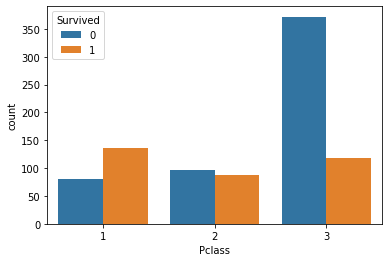

In [65]:
# Pclass別の生存数カウント
import seaborn as sns
sns.countplot(train_df["Pclass"], hue=train_df["Survived"])

In [66]:
# Sex別の生存率
train_df["Survived"].groupby(train_df["Sex"]).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

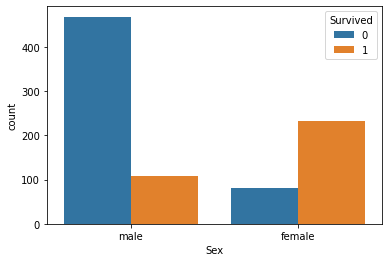

In [67]:
# Sex別の生存数カウント（1:生存, 0:故人）
sns.countplot(train_df["Sex"], hue=train_df["Survived"])

In [68]:
# Ageの抽出
Age0 = train_df[ train_df["Survived"]==0 ]["Age"]
Age1 = train_df[ train_df["Survived"]==1 ]["Age"]

Text(0.5, 0, 'Age')

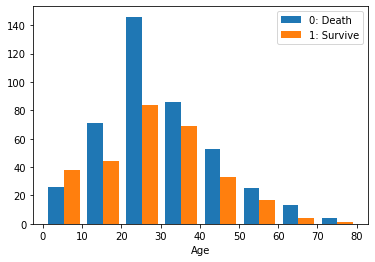

In [69]:
import matplotlib.pyplot as plt
# ヒストグラム
plt.hist( [Age0, Age1], bins=8, label=["0: Death", "1: Survive"] )
plt.legend()
plt.xlabel("Age")

In [70]:
# Fareの抽出
Fare0 = train_df[ train_df["Survived"]==0 ]["Fare"]
Fare1 = train_df[ train_df["Survived"]==1 ]["Fare"]

Text(0.5, 0, 'Fare')

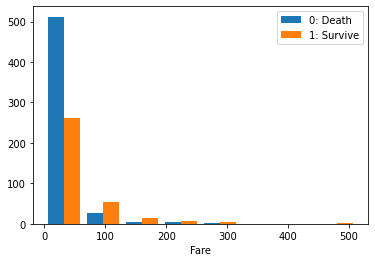

In [71]:
# ヒストグラム
plt.hist( [Fare0, Fare1], bins=8, label=["0: Death", "1: Survive"] )
plt.legend()
plt.xlabel("Fare")

In [72]:
train_df["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [73]:
# 要素毎のデータ数
train_df["Ticket"].value_counts()

347082        7
1601          7
CA. 2343      7
3101295       6
CA 2144       6
             ..
383121        1
230434        1
C.A. 24580    1
226875        1
382651        1
Name: Ticket, Length: 681, dtype: int64

In [74]:
# 先頭の1文字を抽出
train_df["Ticket"] = train_df["Ticket"].str[0]

In [75]:
# Ticket別の生存率
train_df["Survived"].groupby(train_df["Ticket"]).mean()

Ticket
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Ticket', ylabel='count'>

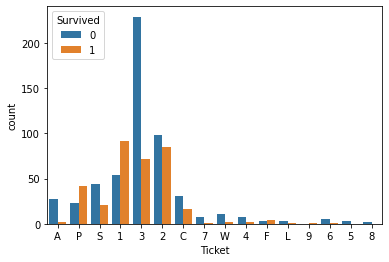

In [76]:
# Ticketの生存数カウント（1:生存, 0:故人）
sns.countplot(train_df["Ticket"], hue=train_df["Survived"])

In [77]:
# データの置換（頻度が少ない要素の統合）
train_df["Ticket"].replace( ["7","W","4","F","L","9","6","5","8"], "X", inplace=True) 

<AxesSubplot:xlabel='Ticket', ylabel='count'>

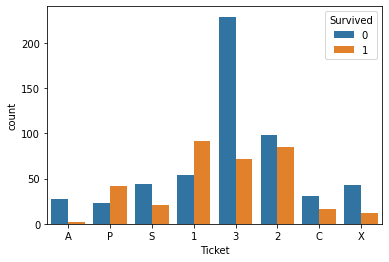

In [78]:
sns.countplot(train_df["Ticket"], hue=train_df["Survived"])

In [79]:
# データの確認
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [80]:
# 文字列の分割
train_df["Name"].str.split( "[, .]", expand=True )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Braund,,Mr,,Owen,Harris,None,None,None,None,None,None,None,None,None,None
1,Cumings,,Mrs,,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
2,Heikkinen,,Miss,,Laina,None,None,None,None,None,None,None,None,None,None,None
3,Futrelle,,Mrs,,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
4,Allen,,Mr,,William,Henry,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Montvila,,Rev,,Juozas,None,None,None,None,None,None,None,None,None,None,None
887,Graham,,Miss,,Margaret,Edith,None,None,None,None,None,None,None,None,None,None
888,Johnston,,Miss,,Catherine,Helen,"""Carrie""",None,None,None,None,None,None,None,None,None
889,Behr,,Mr,,Karl,Howell,None,None,None,None,None,None,None,None,None,None


In [81]:
# 頻度が少ない要素の統合
tmp = train_df["Name"].str.split( "[, .]", expand=True )
train_df["Name"] = tmp[2]

In [82]:
# 要素毎のデータ数
train_df["Name"].value_counts()

Mr            502
Miss          179
Mrs           121
Master         40
               19
Dr              7
Rev             6
Castellana      2
Col             2
Major           2
Mlle            2
Jonkheer        1
Capt            1
the             1
hoef            1
Mme             1
Don             1
More            1
Manent          1
Ms              1
Name: Name, dtype: int64

<AxesSubplot:xlabel='Name', ylabel='count'>

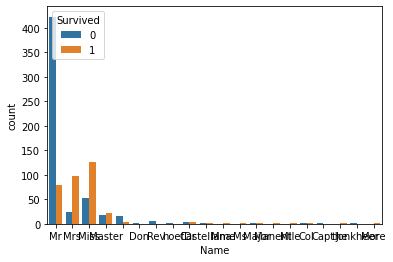

In [83]:
# Nameの生存数カウント（1:生存, 0:故人）
sns.countplot(train_df["Name"], hue=train_df["Survived"])

In [84]:
# 頻度が少ない要素の統合 (対象要素が多い場合)
tmp = train_df["Name"].copy()
tmp[ : : ] = "X" # [ : : ]は全ての意
tmp[ train_df["Name"] == "Mr" ] = "Mr"
tmp[ train_df["Name"] == "Miss" ] = "Miss"
tmp[ train_df["Name"] == "Mrs" ] = "Mrs"
train_df["Name"] = tmp

In [85]:
# Name別の生存率
train_df["Survived"].groupby(train_df["Name"]).mean()

Name
Miss    0.703911
Mr      0.157371
Mrs     0.801653
X       0.449438
Name: Survived, dtype: float64

In [131]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  is_train     891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [135]:
train_df["Family_Size"]=train_df["SibSp"]+train_df["Parch"]
train_df["Survived"].groupby(train_df["Family_Size"]).mean()
# train_df.info()

Family_Size
0     0.303538
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

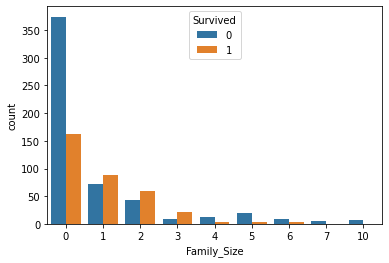

In [136]:
sns.countplot(train_df["Family_Size"], hue=train_df["Survived"])

In [309]:
# 仕切り直し
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

In [310]:
train_df["is_train"]=1
test_df["is_train"]=0
all_df = pd.concat([train_df.drop(columns=["Survived"]), test_df])
all_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [311]:
# 先頭の1文字を抽出
all_df["Ticket"] = all_df["Ticket"].str[0]
# データの置換（頻度が少ない要素の統合）
all_df["Ticket"].replace( ["7","W","4","F","L","9","6","5","8"], "X", inplace=True) 


In [312]:
# 先頭の1文字を抽出
all_df["Cabin"] = all_df["Cabin"].str[0] 

In [313]:
# 文字列の分割
tmp = all_df["Name"].str.split( "[, .]", expand=True )
all_df["Name"] = tmp[2]

In [314]:
# 頻度が少ない要素の統合 (対象要素が多い場合)
tmp = all_df["Name"].copy()
tmp[ : : ] = "X"
tmp[ all_df["Name"] == "Mr" ] = "Mr"
tmp[ all_df["Name"] == "Miss" ] = "Miss"
tmp[ all_df["Name"] == "Mrs" ] = "Mrs"
all_df["Name"] = tmp

In [315]:
#新しい特徴量を作る
all_df["Family_Size"]=all_df["SibSp"]+all_df["Parch"]

In [316]:
all_df["Family_bin"]=4
all_df.loc[all_df["Family_Size"]==1, "Family_bin"]=1
all_df.loc[(all_df["Family_Size"]>=2) & (all_df["Family_Size"]<=4),"Family_bin"]=2
all_df.loc[(all_df["Family_Size"]>=5) & (all_df["Family_Size"]<=7),"Family_bin"]=3
# all_df.drop(["Family_Size"], axis=1, inplace=True)
all_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_train,Family_Size,Family_bin
0,1,3,Mr,male,22.0,1,0,A,7.2500,NaN,S,1,1,1
1,2,1,Mrs,female,38.0,1,0,P,71.2833,C,C,1,1,1
2,3,3,Miss,female,26.0,0,0,S,7.9250,NaN,S,1,0,4
3,4,1,Mrs,female,35.0,1,0,1,53.1000,C,S,1,1,1
4,5,3,Mr,male,35.0,0,0,3,8.0500,NaN,S,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,NaN,0,0,A,8.0500,NaN,S,0,0,4
414,1306,1,X,female,39.0,0,0,P,108.9000,C,C,0,0,4
415,1307,3,Mr,male,38.5,0,0,S,7.2500,NaN,S,0,0,4
416,1308,3,Mr,male,NaN,0,0,3,8.0500,NaN,S,0,0,4


### スコア
- 0.73923(最初)
- 0.74880(Family_sizeの導入)
- 0.75358(ビニング処理 Family_binの導入)

In [317]:
# ダミー変数への変換
all_df = pd.get_dummies( all_df, drop_first=True )

In [318]:
# 欠損値の確認
all_df.isna().sum()

PassengerId      0
Pclass           0
Age            263
SibSp            0
Parch            0
Fare             1
is_train         0
Family_Size      0
Family_bin       0
Name_Mr          0
Name_Mrs         0
Name_X           0
Sex_male         0
Ticket_2         0
Ticket_3         0
Ticket_A         0
Ticket_C         0
Ticket_P         0
Ticket_S         0
Ticket_X         0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [319]:
# 欠損値を平均値で埋める
all_df["Age"] = all_df["Age"].fillna( all_df["Age"].mean() )
all_df["Fare"] = all_df["Fare"].fillna( all_df["Fare"].mean() )
# all_df["Embarked"] = all_df["Embarked"].fillna(all_df["Embarked"].mean())
# passenger_IDを消す
all_df.drop(["PassengerId"], axis=1, inplace=True)
all_df

,Pclass,Age,SibSp,Parch,Fare,is_train,Family_Size,Family_bin,Name_Mr,Name_Mrs,...,Ticket_X,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.000000,1,0,71.2833,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3,26.000000,0,0,7.9250,1,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.000000,1,0,53.1000,1,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,1,0,4,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.881138,0,0,8.0500,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,1
414,1,39.000000,0,0,108.9000,0,0,4,0,0,...,0,0,1,0,0,0,0,0,0,0
415,3,38.500000,0,0,7.2500,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,1
416,3,29.881138,0,0,8.0500,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,1


In [320]:
train_X=all_df[all_df["is_train"]==1].drop(["is_train"], axis=1)
test_X=all_df[all_df["is_train"]==0].drop(["is_train"], axis=1)

In [321]:
train_Y=train_df["Survived"]

In [322]:
# 機械学習の利用 (ランダムフォレスト)
from sklearn.ensemble import RandomForestClassifier
# 学習の設定 (木の数, 評価関数, 乱数の種)
model = RandomForestClassifier( n_estimators=50, max_depth=None, random_state=1080 )
# 学習
model.fit( train_X, train_Y )

RandomForestClassifier(n_estimators=50, random_state=1080)

In [323]:
pred_test_Y = model.predict(test_X)
print(pred_test_Y)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0
 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [324]:
# 予測結果の出力
file = pd.read_csv("./gender_submission.csv")
file["Survived"] = pred_test_Y.astype(int) # 整数型に変換 (少数点以下を削除)
file.to_csv("./submission_rf.csv", index=False) # indexは上書きしない

- よろしくお願いします  
- なんてこった
- うおおお